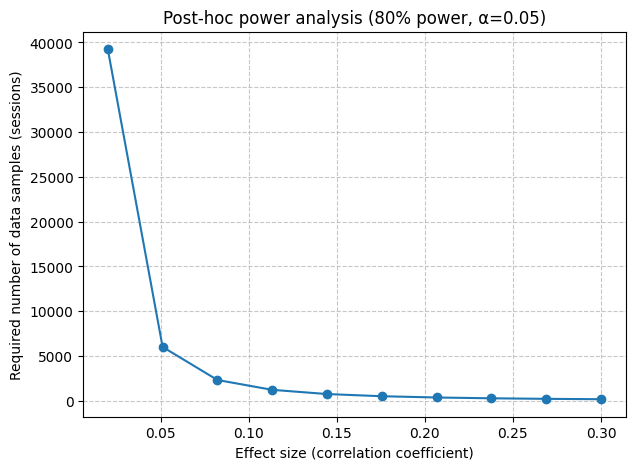

Effect size=0.02 -> required n ≈ 39246.0
Effect size=0.05 -> required n ≈ 6011.0
Effect size=0.08 -> required n ≈ 2323.0
Effect size=0.11 -> required n ≈ 1224.0
Effect size=0.14 -> required n ≈ 754.0
Effect size=0.18 -> required n ≈ 511.0
Effect size=0.21 -> required n ≈ 369.0
Effect size=0.24 -> required n ≈ 279.0
Effect size=0.27 -> required n ≈ 219.0
Effect size=0.30 -> required n ≈ 176.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import poisson, norm, spearmanr

# Parameters
alpha = 0.05
power_target = 0.8
effect_sizes = np.linspace(0.02, 0.3, 10)  # possible effect sizes (correlation coefficients)
n_sessions = 100   # how many simulated sessions for null distribution
timepoints = 200   # length of each session
lam = 3.0          # Poisson rate for LC spiking

# Step 1: Generate null distribution of correlation coefficients
def simulate_null_correlations(n_sessions, timepoints, lam):
    corrs = []
    for _ in range(n_sessions):
        lc = poisson.rvs(mu=lam, size=timepoints)       # Poisson LC spikes
        pupil = norm.rvs(size=timepoints)               # Gaussian pupil
        rho, _ = spearmanr(lc, pupil)                   # non-parametric correlation
        corrs.append(rho)
    return np.array(corrs)

null_corrs = simulate_null_correlations(n_sessions, timepoints, lam)

# Step 2: Post-hoc power analysis using TTestIndPower
analysis = TTestIndPower()
required_ns = []

for eff in effect_sizes:
    # Cohen's d is effect size; here we approximate d ~ correlation
    n_required = analysis.solve_power(effect_size=eff,
                                      power=power_target,
                                      alpha=alpha,
                                      alternative='two-sided')
    required_ns.append(np.ceil(n_required))

# Step 3: Plot results
plt.figure(figsize=(7,5))
plt.plot(effect_sizes, required_ns, marker='o')
plt.xlabel("Effect size (correlation coefficient)")
plt.ylabel("Required number of data samples (sessions)")
plt.title("Post-hoc power analysis (80% power, α=0.05)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print table of results
for e, n in zip(effect_sizes, required_ns):
    print(f"Effect size={e:.2f} -> required n ≈ {n}")
